In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2015-01-01'
end = '2024-12-21'
stock = 'BTC-USD'
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...,...
3472,2024-07-04,60147.136719,60399.675781,56777.804688,56977.703125,56977.703125,41149609230
3473,2024-07-05,57022.808594,57497.152344,53717.375000,56662.375000,56662.375000,55417544033
3474,2024-07-06,56659.074219,58472.546875,56038.960938,58303.539062,58303.539062,20610320577
3475,2024-07-07,58239.429688,58371.121094,55793.324219,55849.109375,55849.109375,20553359505


In [4]:
av_100day= data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

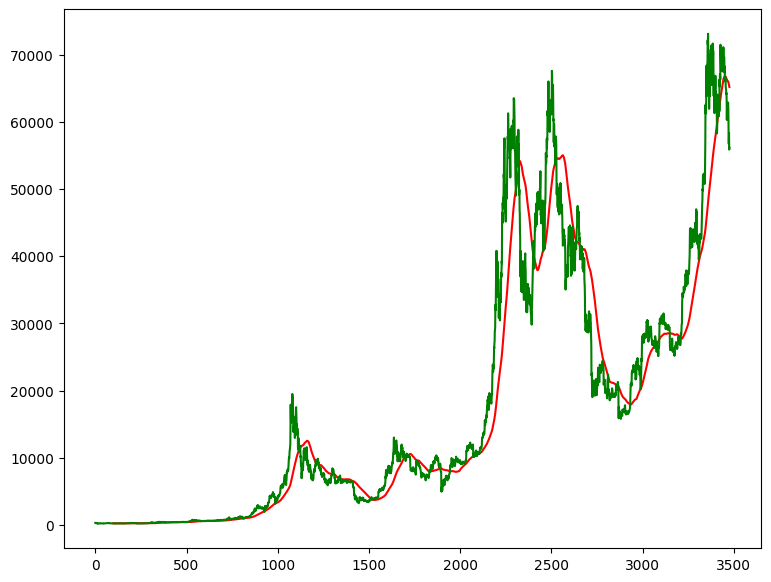

In [5]:
plt.figure(figsize=(9,7))
plt.plot(av_100day, 'r')
plt.plot(data.Close, 'g')
plt.show

In [6]:
av_200day = data.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

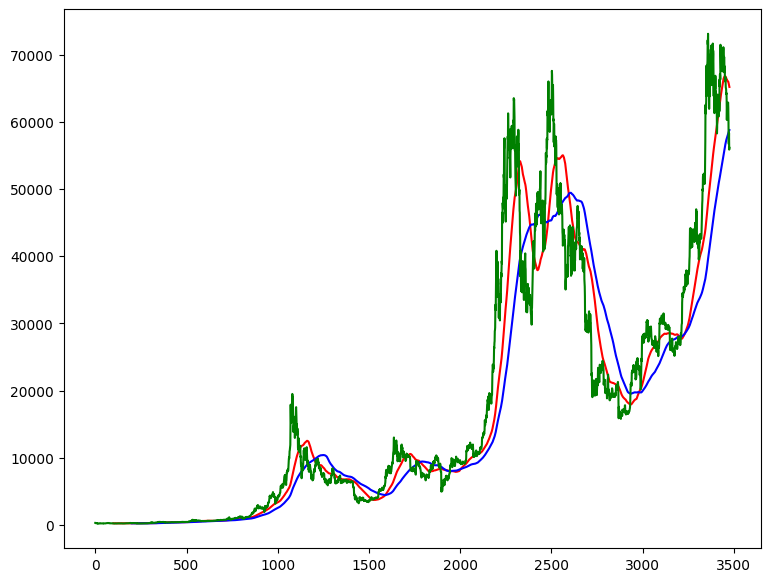

In [7]:
plt.figure(figsize=(9,7))
plt.plot(av_100day, 'r')
plt.plot(av_200day, 'b')
plt.plot(data.Close, 'g')
plt.show

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.70)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.70): (len(data))])

In [10]:
data_train.shape[0]

2433

In [11]:
data_test.shape[0]

1044

In [12]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0, 1))

In [13]:
data_train_scale = scale.fit_transform(data_train)

In [14]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [15]:
x, y =  np.array(x), np.array(y)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

C:\Users\rheyn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 52s 388ms/step - loss: 0.0315
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 53s 545ms/step - loss: 0.0057
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 31s 400ms/step - loss: 0.0046
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - loss: 0.0032
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 37s 342ms/step - loss: 0.0039
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 53s 512ms/step - loss: 0.0031
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 30s 355ms/step - loss: 0.0030
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 44s 387ms/step - loss: 0.0031
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 335ms/step - loss: 0.0024
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 45s 393ms/step - loss: 0.0025
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 351ms/step - loss: 0.0029
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 44s 393ms/step - loss: 0.0026
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 420ms/step - loss: 0.0025
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 369ms/step - loss: 0.0030
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 44s 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
pass_100day = data_train.tail(100)

In [26]:
data_test = pd.concat([pass_100day, data_test], ignore_index=True)


In [27]:
data_test_scale = scale.fit_transform(data_test)

In [29]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [30]:
y_predict = model.predict(x)

39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step


In [38]:
scaler = 1/scale.scale_

In [39]:
y_predict = y_predict*scaler

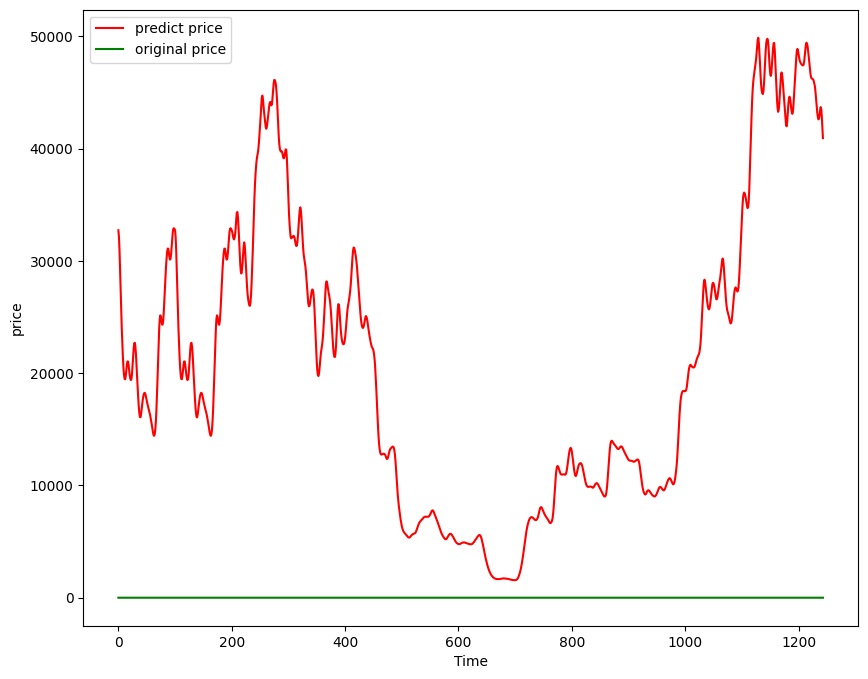

In [40]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'predict price')
plt.plot(y, 'g', label = 'original price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [44]:
model.save('model stock market predict.keras')